In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/test_amazon.csv")

In [ ]:
new_df = df.iloc[:5000]

In [ ]:
new_df.head()

,label,text
0,0,Not worth the money: Banks'book Oscilloscope G...
1,0,I changed my mind: When I first reviewed this ...
2,0,How quickly we fail...: I was initially enthus...
3,0,DOA Did Not Power up out of the box: DOA produ...
4,0,support: I ordered this nursing bra after look...


# Stage 1 : Convert into lower text

In [ ]:
clean_text_1 = []

def to_lower_case(data):
    for word in data:
        clean_text_1.append(word.lower())
to_lower_case(new_df.text)

In [ ]:
clean_text_1[:5]

["not worth the money: banks'book oscilloscope guide uses large print and offers little information and there are mistakes...there is some useful information there but not worth the high price.",
 "i changed my mind: when i first reviewed this album two years ago, i gave it a glowing reviews. unfortunately, the album doesn't have too much lasting value. they initially impressed me due to the vocalist's similarity to maynard james keenan, but the novelty of that wore thin quickly. the band doesn't have too much aside from that to back them up, leaving a rather average nu-metal band. if they worked at developing a more unique sound, there's definite potential for greatness. but as of this record, that potential is far from fulfilled.",
 'how quickly we fail...: i was initially enthusiastic about these "scabs". i followed the instructions carefully but in two repairs, both failed. don\'t let these strand you somewhere--they may seem to be working at first. it took 2 weeks for my repairs t

In [ ]:
from textblob import TextBlob

sub = []
pol = []
for sent in clean_text_1:
  sub.append(TextBlob(sent).subjectivity)
  pol.append(TextBlob(sent).polarity)

In [ ]:
new_df['subjectivity'] = sub
new_df['polarity'] = pol

<ipython-input-19-12550a917449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['subjectivity'] = sub
<ipython-input-19-12550a917449>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['polarity'] = pol


In [ ]:
new_df[:10]

,label,text,subjectivity,polarity
0,0,Not worth the money: Banks'book Oscilloscope G...,0.238367,0.040969
1,0,I changed my mind: When I first reviewed this ...,0.591667,0.116667
2,0,How quickly we fail...: I was initially enthus...,0.472222,-0.041667
3,0,DOA Did Not Power up out of the box: DOA produ...,0.500000,0.500000
4,0,support: I ordered this nursing bra after look...,0.609416,0.244481
5,1,Rewriting this man's history.: Dr. Walmsley ha...,0.258788,0.055303
6,1,Canon CLI-8 4-Pack Color Ink Tanks for Pixma p...,0.461905,0.278571
7,0,needs parts: My first gopher lost a suction cu...,0.352525,0.082424
8,1,Awesome: Does what it's supposed to do and did...,0.550000,0.500000
9,1,Yeah for Dairy Free!!!: Finally a way to live ...,0.600000,0.321262


In [ ]:
new_df.drop(['label'],axis=1)

,text,subjectivity,polarity
0,Not worth the money: Banks'book Oscilloscope G...,0.238367,0.040969
1,I changed my mind: When I first reviewed this ...,0.591667,0.116667
2,How quickly we fail...: I was initially enthus...,0.472222,-0.041667
3,DOA Did Not Power up out of the box: DOA produ...,0.500000,0.500000
4,support: I ordered this nursing bra after look...,0.609416,0.244481
...,...,...,...
4995,Time consuming to assemble: I read reviews for...,0.578125,0.259375
4996,Don't Buy...THEY SHIP THE WRONG SIZE: Ordered ...,0.325595,-0.010119
4997,Great collection!: I heard one of these albums...,0.650159,0.259048
4998,Tortuous Reading: Supposedly the story of a mu...,0.421667,-0.024167


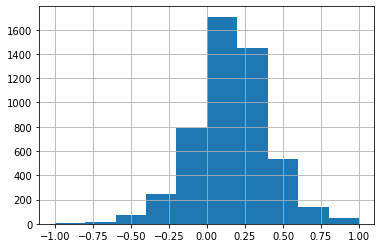

In [ ]:
new_df['polarity'].hist()